In [120]:
from __future__ import division

import matplotlib.pyplot as plt
import pandas as pd
import nltk

from PIL import Image
from wordcloud import WordCloud

%matplotlib inline

# some nicer colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

color_list = [COLOR1, COLOR2, COLOR3, COLOR4, COLOR5]

## Import the "Train" Dataset and Explore

In [169]:
dft = pd.DataFrame.from_csv('train.csv', index_col=None)

## Relevance Summary Stats

In [3]:
print dft.relevance.describe().round(2)

count    74067.00
mean         2.38
std          0.53
min          1.00
25%          2.00
50%          2.33
75%          3.00
max          3.00
Name: relevance, dtype: float64


## Relative Frequency Distribution of Relevance

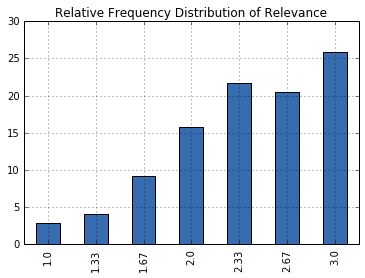

In [185]:
totalc = len(dft)
dft_rf = dft.relevance.value_counts() / totalc * 100
dft_rf = dft_rf.sort_index()
dft_rf = dft_rf[dft_rf > 1]

dft_rf.plot(title='Relative Frequency Distribution of Relevance', kind='bar', color=COLOR5, grid=True);

## Which products are returned most often in search queries with a relevance of 3?

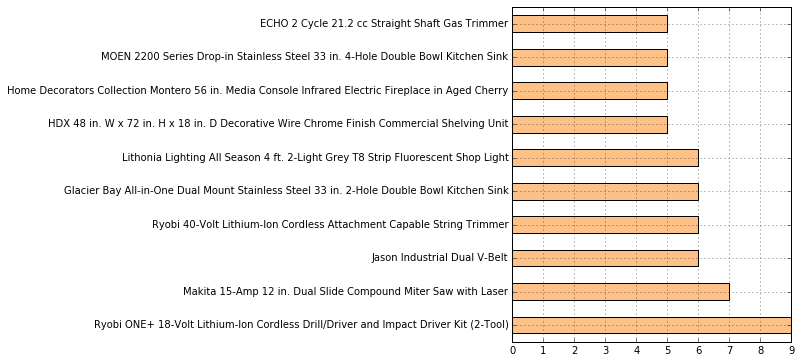

In [89]:
dft_relprod = dft[dft.relevance == 3]
dft_relprod.product_title.value_counts().head(10).plot(kind='barh', figsize=(5, 6), grid=True, color=COLOR3);

## Which products are returned most often in search queries (regardless of relevance)?

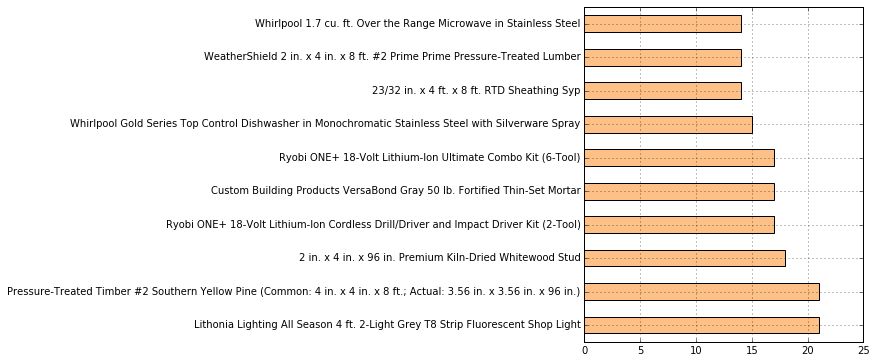

In [90]:
dft.product_title.value_counts().head(10).plot(kind='barh', figsize=(5, 6), grid=True, color=COLOR3);

## Which words occur most frequently in the "product_title"?

In [86]:
# Build lists of words, symbols, and tokens from product_title

product_words_list = []
product_symbols_list = []
product_tokens = []
excluded = 0

products = dft.product_title

for product in products:
    temps = []
    try:
        temps = nltk.word_tokenize(product)
        product_tokens.append(temps)
    except UnicodeDecodeError:
        excluded += 1
        pass
    for temp in temps:
        try:
            if temp.isalpha():
                product_words_list.append(temp)
            elif '-' == temp:
                product_symbols_list.append(temp)
            elif '-' in temp:
                product_words_list.append(temp)
            elif '.' in temp and '.' != temp:
                product_words_list.append(temp)
            else:
                product_symbols_list.append(temp)
        except UnicodeDecodeError:
            pass

print "excluded items due to nltk UnicodeDecodeError =", excluded

excluded items due to nltk UnicodeDecode Error= 58


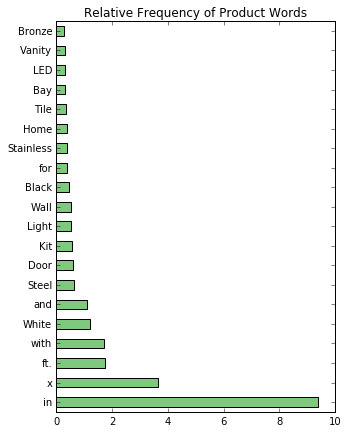

In [187]:
dft_pwl = pd.DataFrame(product_words_list)
freq_pwl = dft_pwl[0].value_counts().sort_values(ascending=False).head(20) / len(dft_pwl) * 100
freq_pwl.plot(kind='barh', color=COLOR1, figsize=(5, 7), title='Relative Frequency of Product Words');

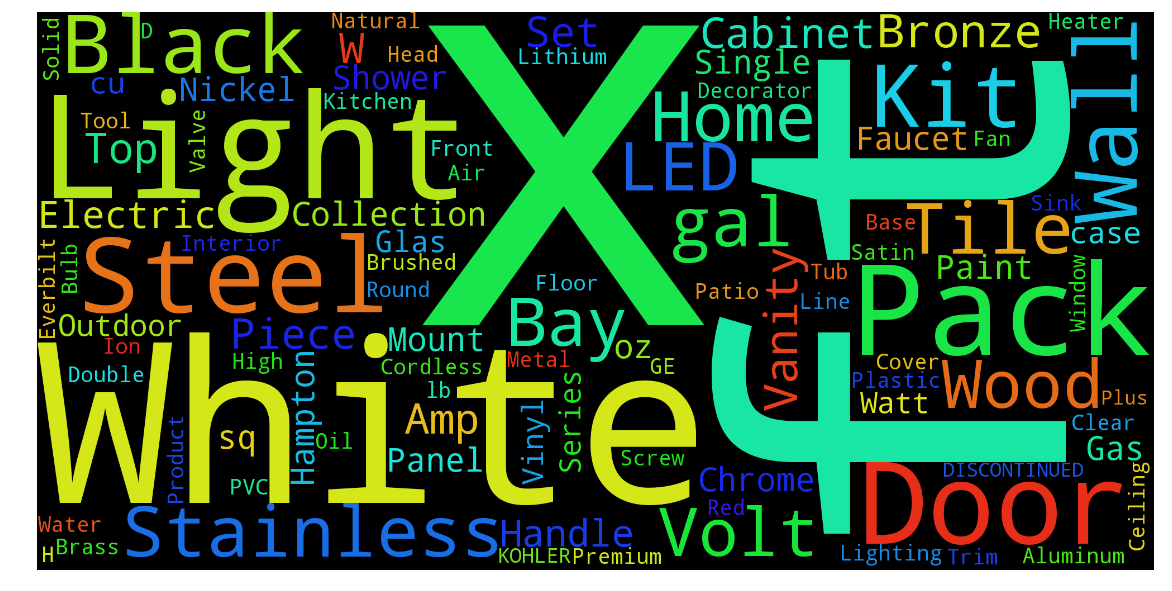

In [168]:
# Create a string of Product Words from product_word_list
product_words_string = ' '.join(product_words_list)

# Create wordcloud object
prod_wordcloud = WordCloud(background_color='black', max_words=100, width=2000, height=1000).generate(product_words_string)

# Plot
plt.figure(figsize=(20,10))
plt.imshow(prod_wordcloud);
plt.axis('off');

In [172]:
dft.head(2)

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.0
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.5


## Which words occur most frequently in the "search_term"?

In [181]:
# Build lists of words, symbols, and tokens from search_term

search_word_list = []
search_symbol_list = []
search_tokens = []
excluded = 0

searches = dft.search_term

for search in searches:
    temps = []
    try:
        temps = nltk.word_tokenize(search)
        search_tokens.append(temps)
    except UnicodeDecodeError:
        excluded += 1
        pass
    for temp in temps:
        try:
            if temp.isalpha():
                search_word_list.append(temp)
            elif '-' == temp:
                search_symbol_list.append(temp)
            elif '-' in temp:
                search_word_list.append(temp)
            elif '.' in temp and '.' != temp:
                search_word_list.append(temp)
            else:
                search_symbols_list.append(temp)
        except UnicodeDecodeError:
            pass

print "excluded items due to nltk UnicodeDecodeError =", excluded

excluded items due to nltk UnicodeDecodeError = 0


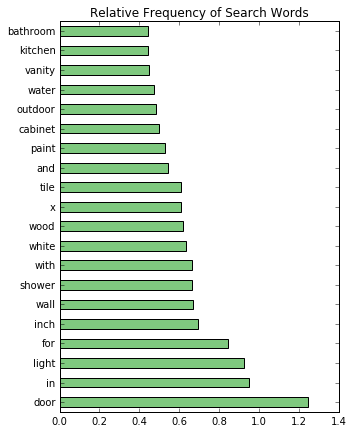

In [188]:
dft_swl = pd.DataFrame(search_word_list)
freq_swl = dft_swl[0].value_counts().sort_values(ascending=False).head(20) / len(dft_swl) * 100
freq_swl.plot(kind='barh', color=COLOR1, figsize=(5, 7), title='Relative Frequency of Search Words');

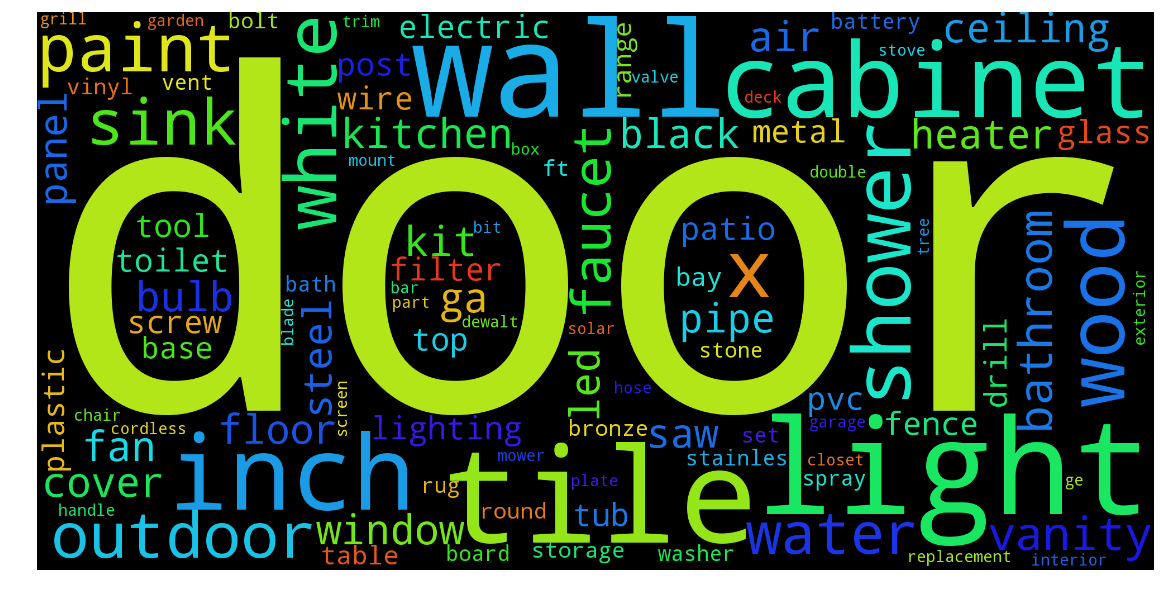

In [184]:
# Create a string of Product Words from product_word_list
search_word_string = ' '.join(search_word_list)

# Create wordcloud object
prod_wordcloud = WordCloud(background_color='black', max_words=100, width=2000, height=1000).generate(search_word_string)

# Plot
plt.figure(figsize=(20,10))
plt.imshow(prod_wordcloud);
plt.axis('off');